# Build amd Deploy Machine Learning Model 

### Load Libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

### Exploratory Data Analysis

In [3]:
mpg = sns.load_dataset(name='mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [5]:
mpg.isna().sum().mul(100)/len(mpg)

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [6]:
mpg.dropna(subset=['horsepower'], inplace=True)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

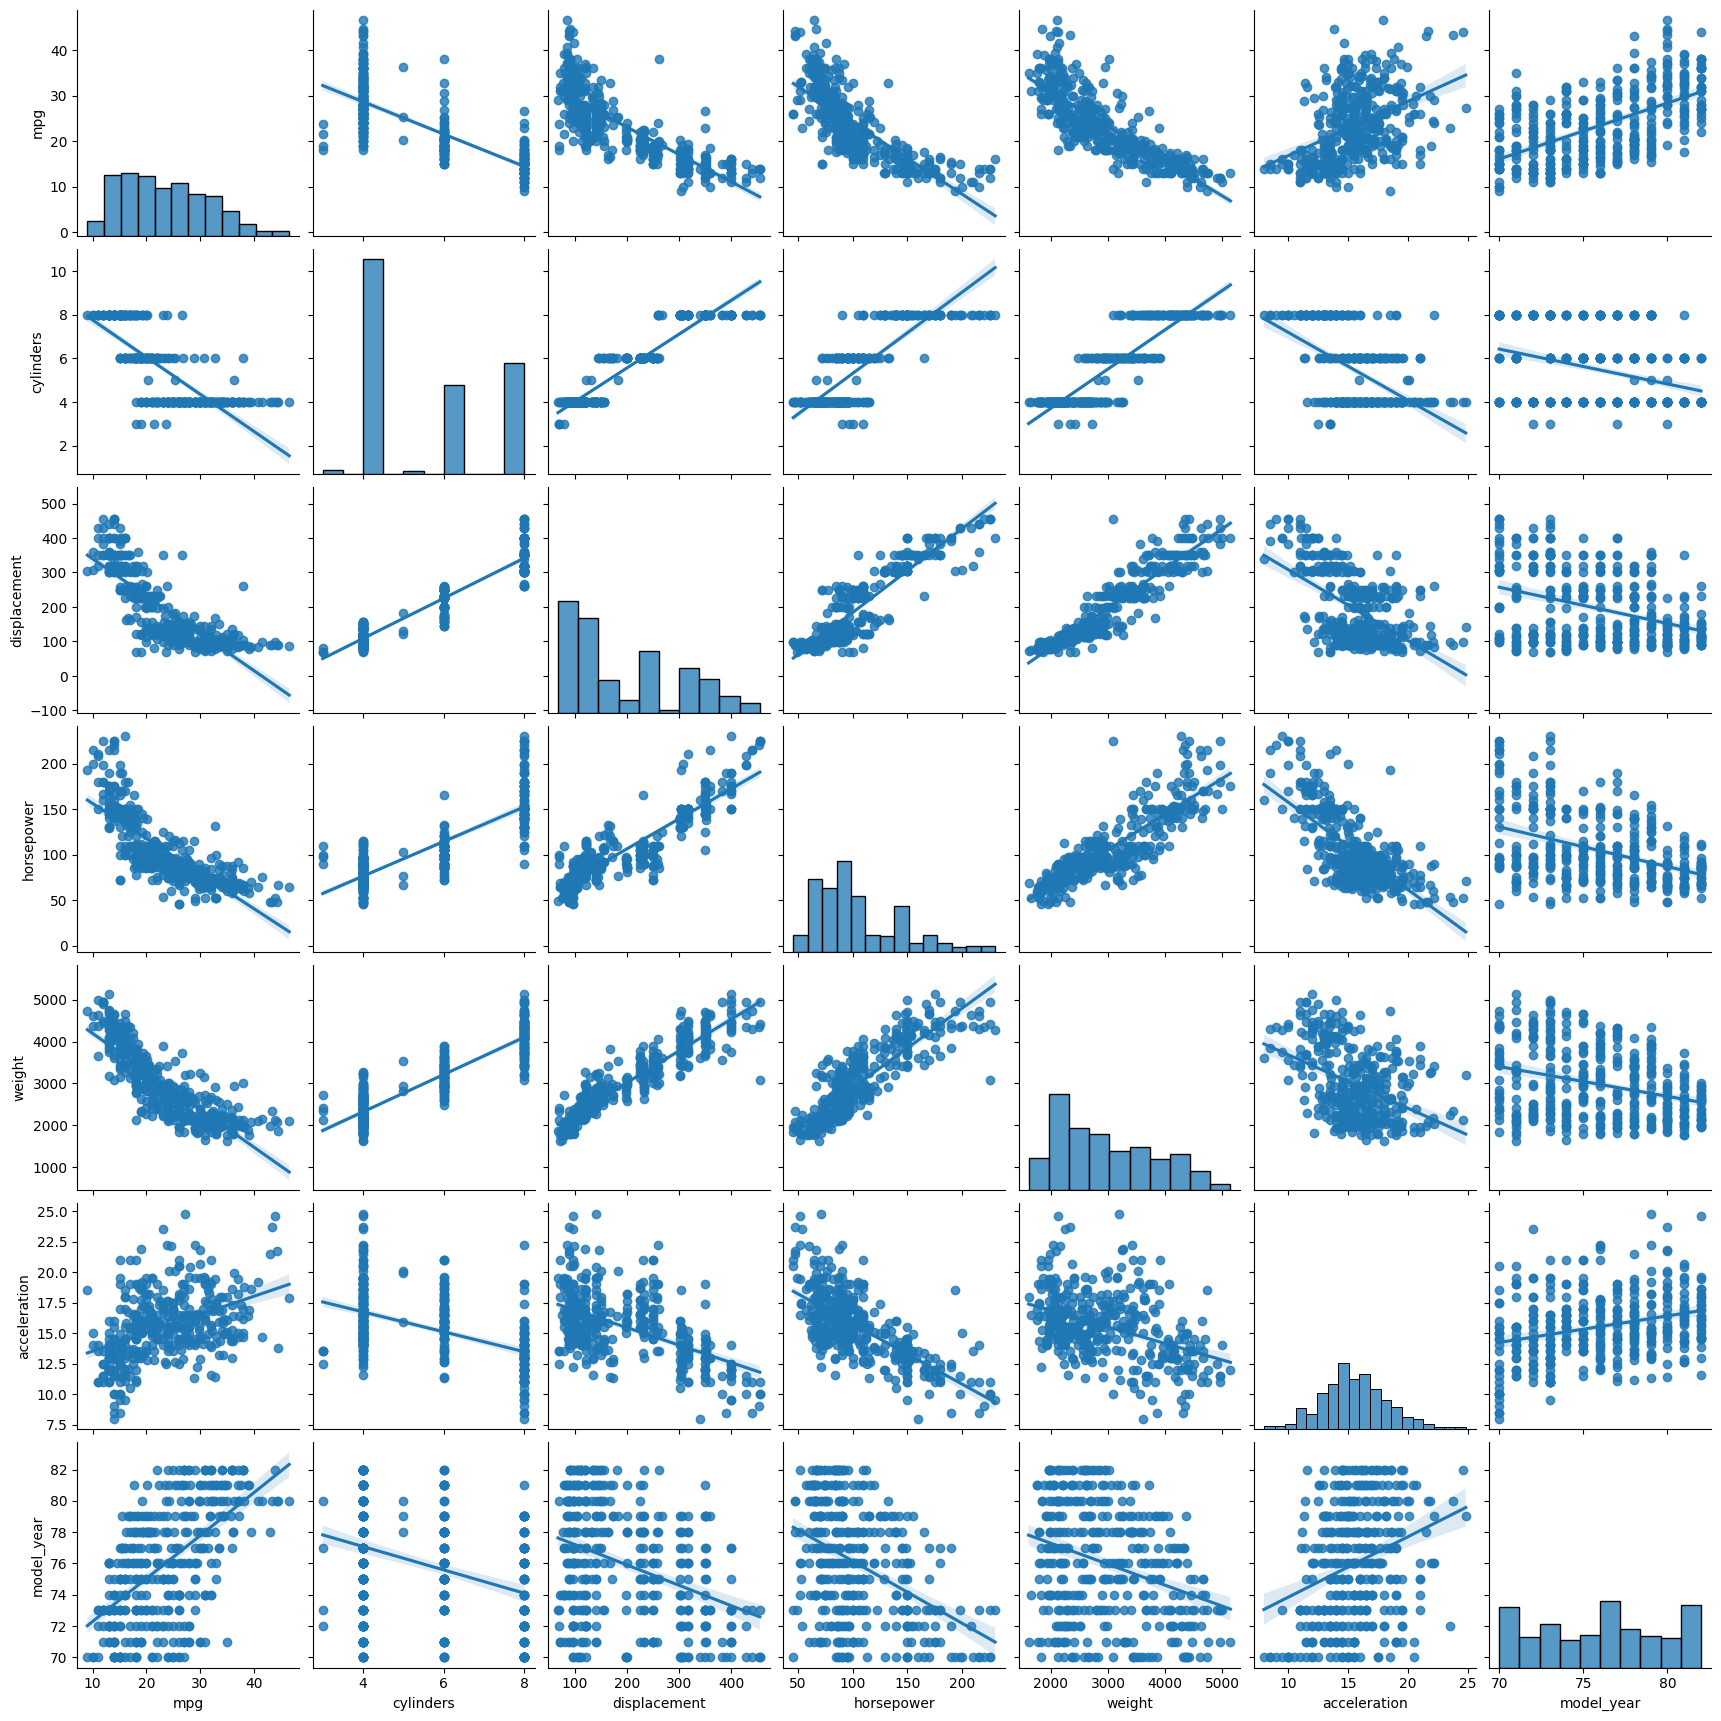

In [7]:
sns.pairplot(
    data=mpg.select_dtypes(include='number'),
    kind='reg',
)

<Axes: xlabel='horsepower', ylabel='mpg'>

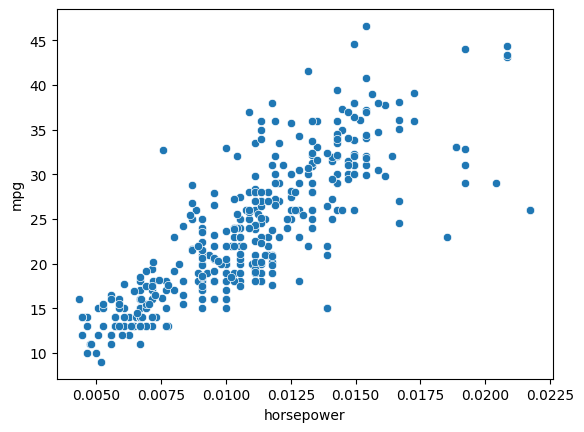

In [8]:
sns.scatterplot(x=1/mpg['horsepower'], y=mpg['mpg'])

<Axes: xlabel='weight', ylabel='mpg'>

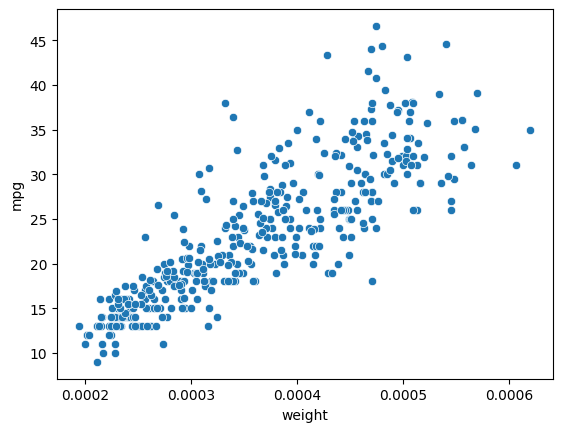

In [9]:
sns.scatterplot(x=1/mpg['weight'], y=mpg['mpg'])

In [10]:
mpg['inv_mpg'] = 1/mpg['mpg']

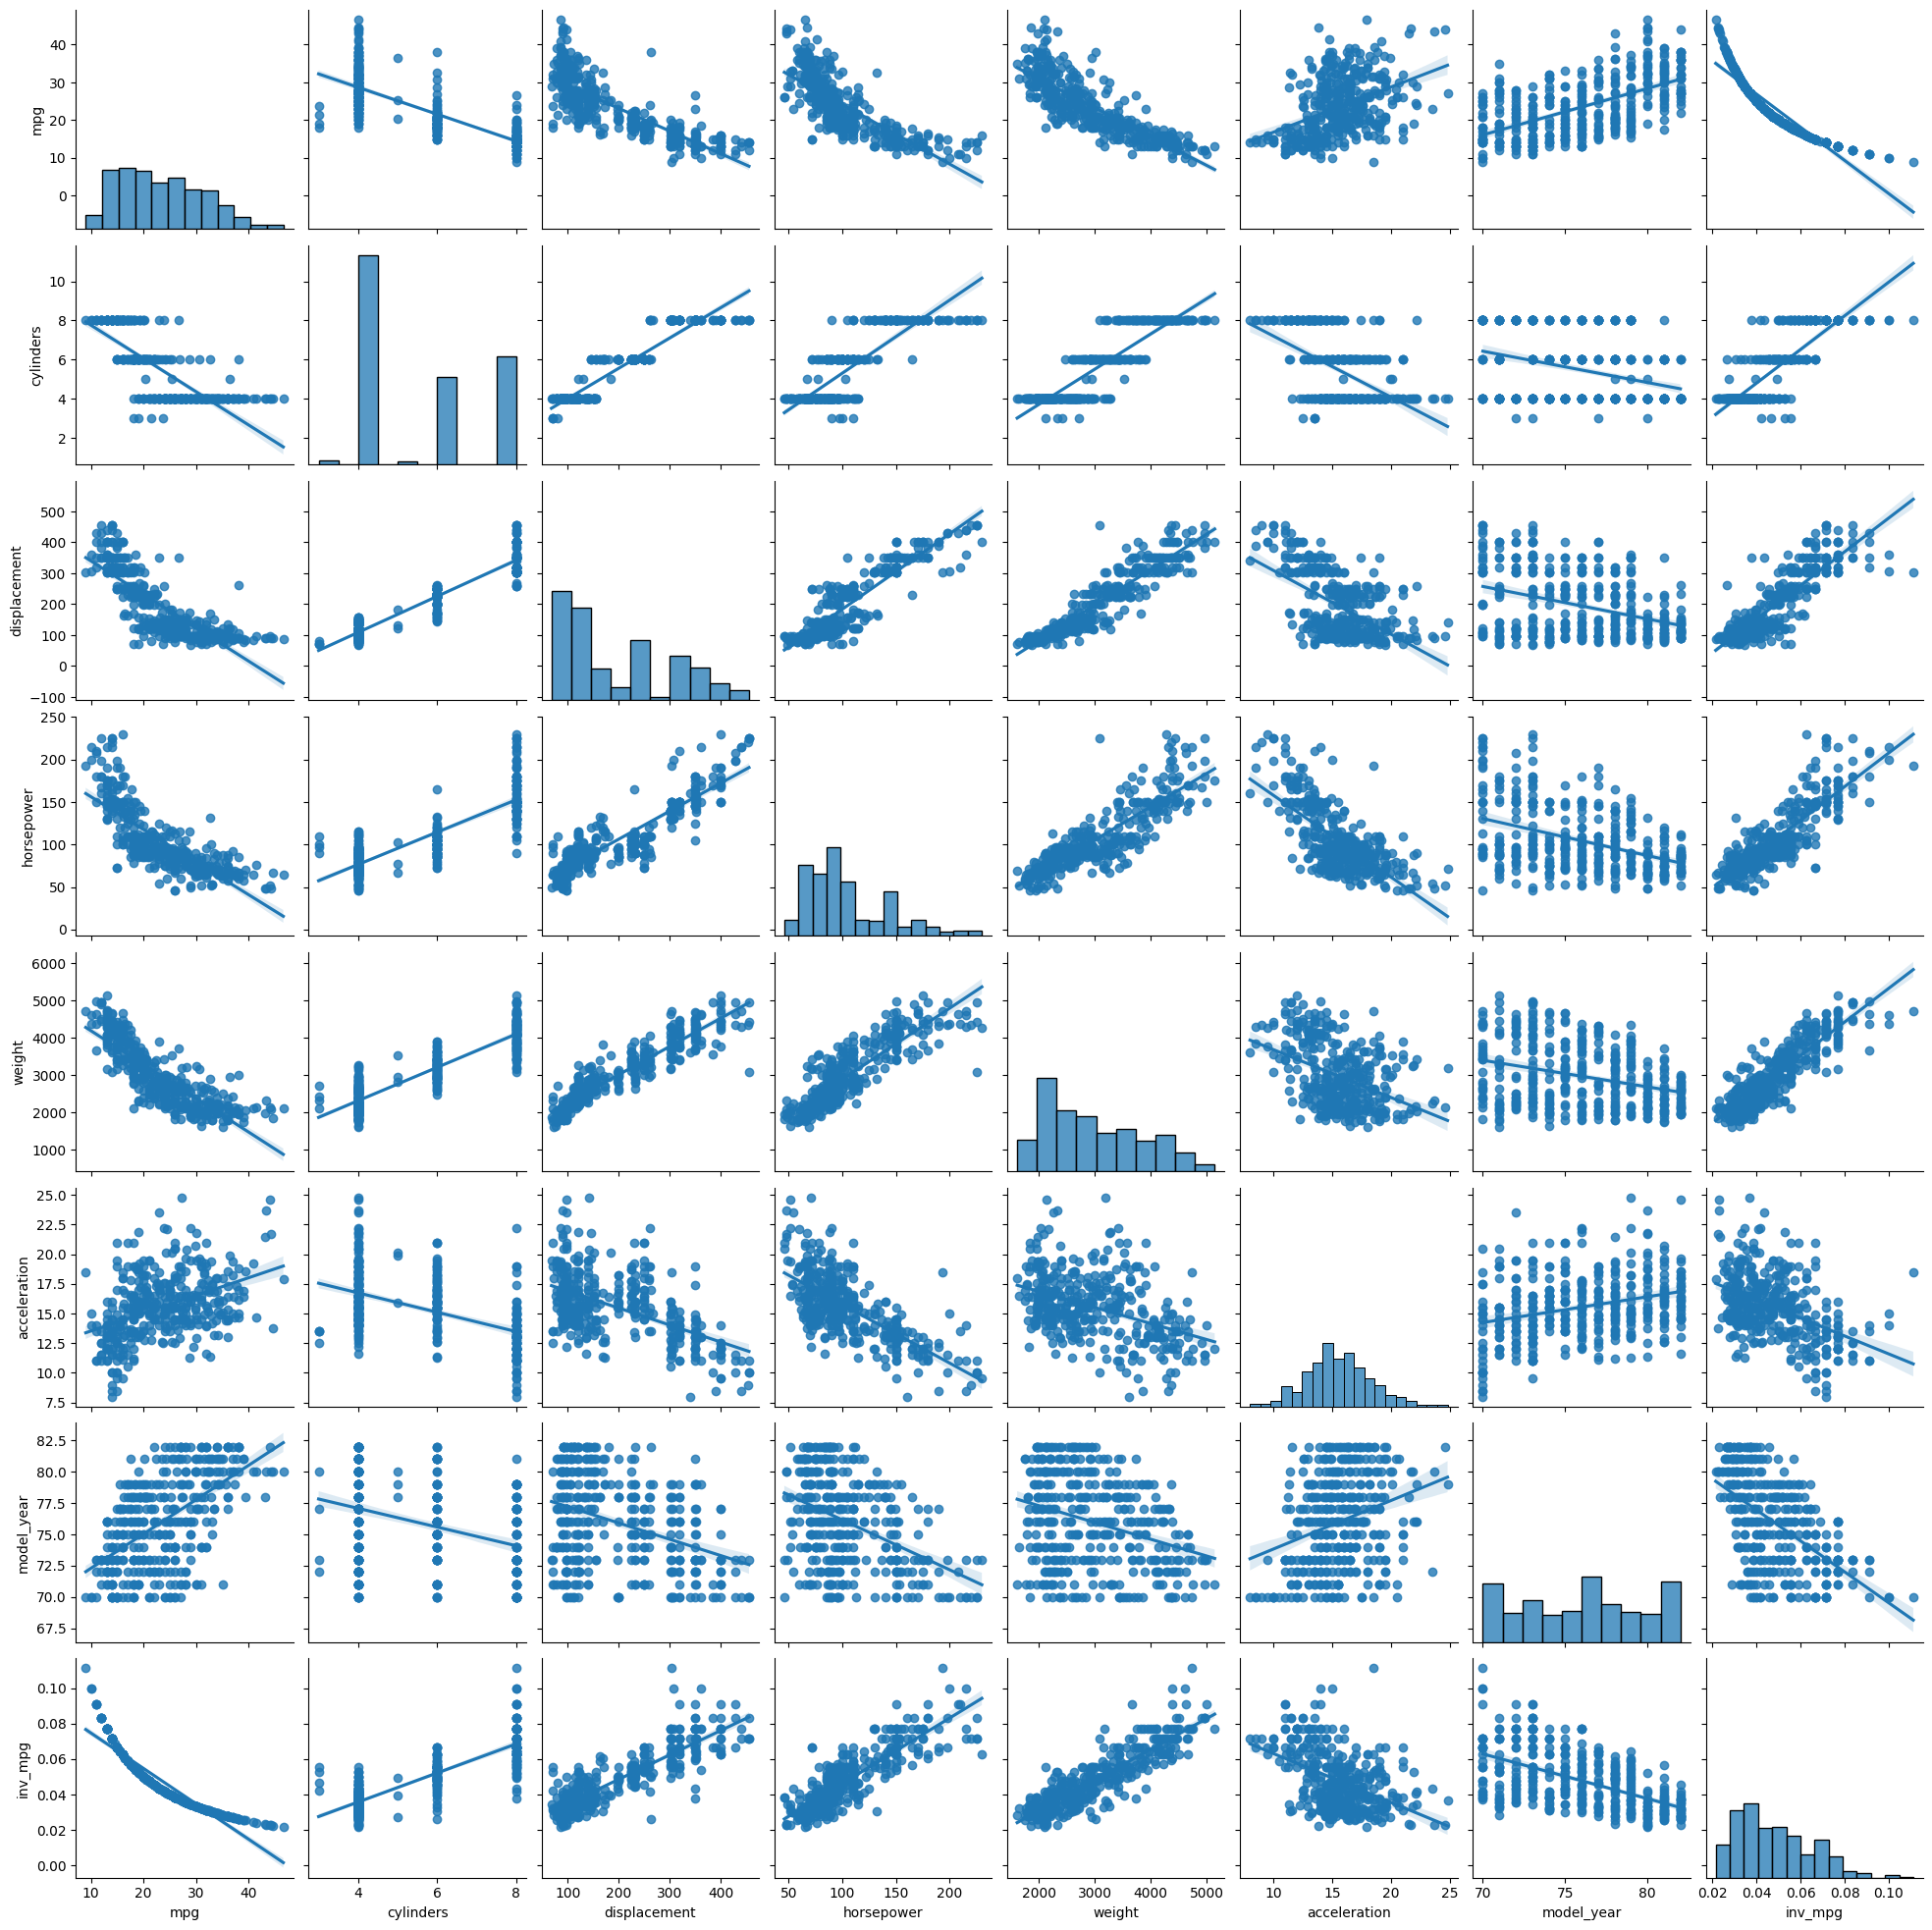

In [11]:
sns.pairplot(data=mpg.select_dtypes(include="number"), kind='reg')

In [12]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'inv_mpg'],
      dtype='object')

In [13]:
mpg.select_dtypes(include='object').columns

Index(['origin', 'name'], dtype='object')

In [14]:
mpg['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [15]:
mpg['model_year'].value_counts().sort_index()

model_year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64

In [16]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'inv_mpg'],
      dtype='object')

In [17]:
target = 'inv_mpg'
features = [
       'cylinders',
       'displacement',
       'horsepower', 
       'weight',
       'acceleration', 
       'model_year',
       'origin',
]

In [18]:
df = mpg[features + [target]].copy()
df.sample(n=10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,inv_mpg
376,4,91.0,68.0,2025,18.2,82,japan,0.027027
53,4,71.0,65.0,1773,19.0,71,japan,0.032258
133,6,250.0,100.0,3781,17.0,74,usa,0.062500
185,4,98.0,79.0,2255,17.7,76,usa,0.038462
313,4,151.0,90.0,2678,16.5,80,usa,0.035714
164,6,231.0,110.0,3039,15.0,75,usa,0.047619
154,6,250.0,72.0,3432,21.0,75,usa,0.066667
293,4,89.0,71.0,1925,14.0,79,europe,0.031348
13,8,455.0,225.0,3086,10.0,70,usa,0.071429
183,4,116.0,81.0,2220,16.9,76,europe,0.040000


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
ss = StandardScaler()

In [20]:
features

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

In [21]:
df[
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "model_year",
    ]
] = ss.fit_transform(
    mpg[
        [
            "cylinders",
            "displacement",
            "horsepower",
            "weight",
            "acceleration",
            "model_year",
        ]
    ]
)



In [22]:
df['origin'] = le.fit_transform(mpg['origin'])

In [23]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,inv_mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,2,0.055556
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,2,0.066667
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,2,0.055556
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,2,0.062500
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,2,0.058824


In [24]:
X = df[features].values
y = df[target].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    random_state=42,
)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [29]:
lr.score(X=X_train, y=y_train)

0.8846044492611473

In [30]:
lr.score(X=X_test, y=y_test)

0.890779251538999

In [31]:
import pickle

In [32]:
with open(file='lr.pkl', mode='wb') as lr_file:
    pickle.dump(obj=lr, file=lr_file)

In [33]:
with open(file='lr.pkl', mode='rb') as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LinearRegression()


In [34]:
lr_loaded.score(X=X_test, y=y_test)

0.890779251538999

In [35]:
with open(file='le.pkl', mode='wb') as le_file:
    pickle.dump(obj=le, file=le_file)

In [36]:
with open(file='ss.pkl', mode='wb') as ss_file:
    pickle.dump(obj=ss, file=ss_file)

In [37]:
df.columns.to_list()

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'inv_mpg']